# Train and test AVIDNet

In [1]:
import torch
import os
from torchsummary import summary
from collections import defaultdict

from datasets.utils import get_data_transforms, separate_datasets, get_data_loaders, show_samples
from models.model import get_model
from models.train import train_model
from models.metrics import update_mean_metrics, print_metrics

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Load data

In [3]:
fold = 5
labeled_num_per_cls, mu = 25, 4
batch_size = 6
data_dir = 'data/CXR/train-test'
lb_partial_dir = 'train_lb/train_lb_'
dataset_types = ['train', 'test'] # ['train', 'val', 'test']

In [4]:
#separate_datasets(data_dir, fold, labeled_num_per_cls, mu)

{'train_lb': 75, 'train_ulb': 300, 'train_ulb_wa': 300, 'test': 1582}


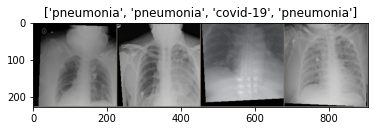

In [5]:
data_transforms = get_data_transforms(purpose='fixaug1')
data_loaders, dataset_sizes, class_names = get_data_loaders(data_transforms, fold, batch_size, dataset_types,
                                                            data_dir, lb_partial_dir, purpose='fixaug1', mu=mu)
print(dataset_sizes)
show_samples(data_loaders, class_names, dataset_type='train_lb')

## Train the model

In [6]:
trained_models = []
cls_names = ['All', 'COVID-19', 'Pneumonia', 'Normal']
metric_types = ['acc'] # metric_types = ['acc', 'ppv', 'recall', 'f1']
mean_metrics = {m_type: defaultdict(float) for m_type in metric_types}
for i in range(fold):
    model_ft, criterion, optimizer_ft, exp_lr_scheduler = get_model(device, fine_tuning=False)
    model, metrics = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, i, cls_names,
                                 metric_types, dataset_types, data_loaders, dataset_sizes, device, num_epochs=20,
                                 lambda_u=1.0, threshold=0.95, purpose='fixmatch')
    trained_models.append(model)
    mean_metrics = update_mean_metrics(cls_names, mean_metrics, metrics, status='training')

mean_metrics = update_mean_metrics(cls_names, mean_metrics, status='final', fold=fold)
print_metrics(mean_metrics, cls_names, phase='Mean results')

--------------------
Model 1
--------------------

Epoch 0/19
----------
[train]
LOSS - 1.1189
ACC - All: 0.3200  COVID-19: 0.2400  Pneumonia: 0.1600  Normal: 0.5600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.0861
ACC - All: 0.4096  COVID-19: 0.7864  Pneumonia: 0.6362  Normal: 0.0067 

Validation loss decreased (inf --> 1.086065).

Epoch 1/19
----------
[train]
LOSS - 1.1115
ACC - All: 0.4400  COVID-19: 0.4800  Pneumonia: 0.4000  Normal: 0.4400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.7201
ACC - All: 0.7535  COVID-19: 0.0097  Pneumonia: 0.9582  Normal: 0.5774 

Validation loss decreased (1.086065 --> 0.720100).

Epoch 2/19
----------
[train]
LOSS - 0.9046
ACC - All: 0.5200  COVID-19: 0.4800  Pneumonia: 0.6000  Normal: 0.4800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.7631
ACC - All: 0.7054  COVID-19: 0.1942  Pneumonia: 0.6102  Normal: 0.9360 

EarlyStopping counter: 1 out of 5

Epoch 3/19
----------
[train]
LOSS - 0.8180
ACC - All: 0.6933  COVID-19: 0.6800  Pneumonia: 

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-54vgp2io'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.7791
ACC - All: 0.6800  COVID-19: 0.4800  Pneumonia: 0.6400  Normal: 0.9200 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.7730
ACC - All: 0.7257  COVID-19: 0.7476  Pneumonia: 0.8723  Normal: 0.5034 

EarlyStopping counter: 3 out of 5

Epoch 5/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-kr5cm17e'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.8419
ACC - All: 0.6267  COVID-19: 0.7600  Pneumonia: 0.7200  Normal: 0.4000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 1.1824
ACC - All: 0.3995  COVID-19: 0.1165  Pneumonia: 0.0328  Normal: 0.9949 

EarlyStopping counter: 4 out of 5

Epoch 6/19
----------
[train]
LOSS - 0.7952
ACC - All: 0.6800  COVID-19: 0.5600  Pneumonia: 0.7200  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5604
ACC - All: 0.8047  COVID-19: 0.3398  Pneumonia: 0.8294  Normal: 0.8485 

Validation loss decreased (0.720100 --> 0.560448).

Epoch 7/19
----------
[train]
LOSS - 0.6675
ACC - All: 0.7867  COVID-19: 0.6800  Pneumonia: 0.9200  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.6155
ACC - All: 0.7680  COVID-19: 0.3010  Pneumonia: 0.7175  Normal: 0.9242 

EarlyStopping counter: 1 out of 5

Epoch 8/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-xg19rcs4'


[train]
LOSS - 0.6055
ACC - All: 0.7467  COVID-19: 0.7600  Pneumonia: 0.7200  Normal: 0.7600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6761
ACC - All: 0.7105  COVID-19: 0.2718  Pneumonia: 0.6045  Normal: 0.9444 

EarlyStopping counter: 2 out of 5

Epoch 9/19
----------
[train]
LOSS - 0.6444
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6564
ACC - All: 0.7326  COVID-19: 0.2816  Pneumonia: 0.6452  Normal: 0.9411 

EarlyStopping counter: 3 out of 5

Epoch 10/19
----------
[train]
LOSS - 0.5782
ACC - All: 0.7867  COVID-19: 0.7600  Pneumonia: 0.7200  Normal: 0.8800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6511
ACC - All: 0.7472  COVID-19: 0.3301  Pneumonia: 0.6655  Normal: 0.9411 

EarlyStopping counter: 4 out of 5

Epoch 11/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-4nnxb963'


[train]
LOSS - 0.5420
ACC - All: 0.7867  COVID-19: 0.8400  Pneumonia: 0.7200  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6942
ACC - All: 0.6953  COVID-19: 0.3204  Pneumonia: 0.5638  Normal: 0.9562 

EarlyStopping counter: 5 out of 5

Early stopping!!

--------------------
[Best results]
ACC - All: 0.6953  COVID-19: 0.3204  Pneumonia: 0.5638  Normal: 0.9562 

Training complete in 7m 59s
-------------------- 

--------------------
Model 2
--------------------

Epoch 0/19
----------
[train]
LOSS - 1.0998
ACC - All: 0.3733  COVID-19: 0.3200  Pneumonia: 0.3200  Normal: 0.4800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.8724
ACC - All: 0.5607  COVID-19: 0.0000  Pneumonia: 0.9977  Normal: 0.0067 

Validation loss decreased (inf --> 0.872385).

Epoch 1/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-x95a81bv'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 1.0170
ACC - All: 0.5067  COVID-19: 0.5600  Pneumonia: 0.5600  Normal: 0.4000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.8547
ACC - All: 0.7807  COVID-19: 0.4563  Pneumonia: 0.8169  Normal: 0.7828 

Validation loss decreased (0.872385 --> 0.854735).

Epoch 2/19
----------
[train]
LOSS - 0.8715
ACC - All: 0.6133  COVID-19: 0.6000  Pneumonia: 0.6400  Normal: 0.6000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6320
ACC - All: 0.7807  COVID-19: 0.0485  Pneumonia: 0.8667  Normal: 0.7795 

Validation loss decreased (0.854735 --> 0.631981).

Epoch 3/19
----------
[train]
LOSS - 0.8267
ACC - All: 0.6133  COVID-19: 0.7600  Pneumonia: 0.6400  Normal: 0.4400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.8145
ACC - All: 0.5493  COVID-19: 0.0000  Pneumonia: 0.3367  Normal: 0.9613 

EarlyStopping counter: 1 out of 5

Epoch 4/19
----------
[train]
LOSS - 0.8346
ACC - All: 0.7333  COVID-19: 0.6400  Pneumonia: 0.8800  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-sq_qd7iw'


[train]
LOSS - 0.8096
ACC - All: 0.6800  COVID-19: 0.6000  Pneumonia: 0.6800  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.8221
ACC - All: 0.5777  COVID-19: 0.2039  Pneumonia: 0.3616  Normal: 0.9646 

EarlyStopping counter: 1 out of 5

Epoch 6/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-k8qe5kkd'


[train]
LOSS - 0.9548
ACC - All: 0.6267  COVID-19: 0.7200  Pneumonia: 0.7200  Normal: 0.4400 
Mask ratio's range: 0.875 ~ 1.0

[test]
LOSS - 0.6657
ACC - All: 0.7099  COVID-19: 0.1359  Pneumonia: 0.6271  Normal: 0.9327 

EarlyStopping counter: 2 out of 5

Epoch 7/19
----------
[train]
LOSS - 0.7837
ACC - All: 0.6400  COVID-19: 0.8000  Pneumonia: 0.3600  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6437
ACC - All: 0.7276  COVID-19: 0.1650  Pneumonia: 0.6667  Normal: 0.9158 

EarlyStopping counter: 3 out of 5

Epoch 8/19
----------
[train]
LOSS - 0.5773
ACC - All: 0.8133  COVID-19: 0.9200  Pneumonia: 0.6400  Normal: 0.8800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5768
ACC - All: 0.7756  COVID-19: 0.1942  Pneumonia: 0.7751  Normal: 0.8771 

Validation loss decreased (0.601526 --> 0.576781).

Epoch 9/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-5lqrwsd0'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5622
ACC - All: 0.8267  COVID-19: 0.8800  Pneumonia: 0.8800  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5265
ACC - All: 0.7984  COVID-19: 0.1942  Pneumonia: 0.8689  Normal: 0.7980 

Validation loss decreased (0.576781 --> 0.526451).

Epoch 10/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-crp0q_ku'


[train]
LOSS - 0.5855
ACC - All: 0.7600  COVID-19: 0.8400  Pneumonia: 0.7200  Normal: 0.7200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5764
ACC - All: 0.7743  COVID-19: 0.1748  Pneumonia: 0.7729  Normal: 0.8805 

EarlyStopping counter: 1 out of 5

Epoch 11/19
----------
[train]
LOSS - 0.5700
ACC - All: 0.8400  COVID-19: 0.8800  Pneumonia: 0.7600  Normal: 0.8800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5987
ACC - All: 0.7573  COVID-19: 0.1456  Pneumonia: 0.7345  Normal: 0.8973 

EarlyStopping counter: 2 out of 5

Epoch 12/19
----------
[train]
LOSS - 0.5989
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5629
ACC - All: 0.7794  COVID-19: 0.1262  Pneumonia: 0.7966  Normal: 0.8670 

EarlyStopping counter: 3 out of 5

Epoch 13/19
----------
[train]
LOSS - 0.5858
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5537
ACC - Al

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-nut4lr7i'


[train]
LOSS - 0.6058
ACC - All: 0.8133  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5619
ACC - All: 0.7863  COVID-19: 0.1845  Pneumonia: 0.8023  Normal: 0.8670 

EarlyStopping counter: 5 out of 5

Early stopping!!

--------------------
[Best results]
ACC - All: 0.7863  COVID-19: 0.1845  Pneumonia: 0.8023  Normal: 0.8670 

Training complete in 10m 4s
-------------------- 

--------------------
Model 3
--------------------

Epoch 0/19
----------
[train]
LOSS - 1.1982
ACC - All: 0.3067  COVID-19: 0.4000  Pneumonia: 0.3200  Normal: 0.2000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.7694
ACC - All: 0.5676  COVID-19: 0.0000  Pneumonia: 1.0000  Normal: 0.0219 

Validation loss decreased (inf --> 0.769373).

Epoch 1/19
----------
[train]
LOSS - 1.0829
ACC - All: 0.4933  COVID-19: 0.4800  Pneumonia: 0.4400  Normal: 0.5600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.0338
ACC - All: 0.4330  COVID-19: 0.9417  Pneumonia

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ldbbidxk'


[train]
LOSS - 1.0505
ACC - All: 0.5333  COVID-19: 0.7600  Pneumonia: 0.5200  Normal: 0.3200 
Mask ratio's range: 0.875 ~ 1.0

[test]
LOSS - 1.0629
ACC - All: 0.4324  COVID-19: 0.0583  Pneumonia: 0.0949  Normal: 1.0000 

EarlyStopping counter: 2 out of 5

Epoch 7/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-i4c_mkqk'


[train]
LOSS - 0.9987
ACC - All: 0.5733  COVID-19: 0.3600  Pneumonia: 0.4400  Normal: 0.9200 
Mask ratio's range: 0.875 ~ 1.0

[test]
LOSS - 0.6170
ACC - All: 0.7351  COVID-19: 0.2524  Pneumonia: 0.6452  Normal: 0.9529 

EarlyStopping counter: 3 out of 5

Epoch 8/19
----------
[train]
LOSS - 0.6336
ACC - All: 0.7733  COVID-19: 0.8000  Pneumonia: 0.6800  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5536
ACC - All: 0.7933  COVID-19: 0.3981  Pneumonia: 0.7638  Normal: 0.9057 

Validation loss decreased (0.554519 --> 0.553605).

Epoch 9/19
----------
[train]
LOSS - 0.6630
ACC - All: 0.8000  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5409
ACC - All: 0.8173  COVID-19: 0.3981  Pneumonia: 0.8203  Normal: 0.8855 

Validation loss decreased (0.553605 --> 0.540887).

Epoch 10/19
----------
[train]
LOSS - 0.6639
ACC - All: 0.7333  COVID-19: 0.8000  Pneumonia: 0.7200  Normal: 0.6800 
Mask ratio'

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-epn29f4a'


[train]
LOSS - 0.6730
ACC - All: 0.7467  COVID-19: 0.8000  Pneumonia: 0.6400  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6226
ACC - All: 0.7440  COVID-19: 0.4272  Pneumonia: 0.6486  Normal: 0.9411 

EarlyStopping counter: 1 out of 5

Epoch 14/19
----------
[train]
LOSS - 0.5184
ACC - All: 0.8667  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.8800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5923
ACC - All: 0.7636  COVID-19: 0.4175  Pneumonia: 0.6960  Normal: 0.9242 

EarlyStopping counter: 2 out of 5

Epoch 15/19
----------
[train]
LOSS - 0.5922
ACC - All: 0.8267  COVID-19: 0.9200  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5665
ACC - All: 0.7908  COVID-19: 0.4466  Pneumonia: 0.7537  Normal: 0.9057 

EarlyStopping counter: 3 out of 5

Epoch 16/19
----------
[train]
LOSS - 0.5797
ACC - All: 0.8000  COVID-19: 0.8800  Pneumonia: 0.7200  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-8403bndf'


[train]
LOSS - 0.7100
ACC - All: 0.7067  COVID-19: 0.7200  Pneumonia: 0.6800  Normal: 0.7200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.7780
ACC - All: 0.6429  COVID-19: 0.3883  Pneumonia: 0.4655  Normal: 0.9512 

EarlyStopping counter: 1 out of 5

Epoch 5/19
----------
[train]
LOSS - 0.8035
ACC - All: 0.6000  COVID-19: 0.6800  Pneumonia: 0.7200  Normal: 0.4000 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.8359
ACC - All: 0.5651  COVID-19: 0.2039  Pneumonia: 0.3299  Normal: 0.9781 

EarlyStopping counter: 2 out of 5

Epoch 6/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-1cbhbvxc'


[train]
LOSS - 0.6969
ACC - All: 0.7467  COVID-19: 0.8800  Pneumonia: 0.7200  Normal: 0.6400 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5494
ACC - All: 0.7863  COVID-19: 0.1165  Pneumonia: 0.8576  Normal: 0.7963 

Validation loss decreased (0.638395 --> 0.549438).

Epoch 7/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-53367nl_'


[train]
LOSS - 0.8652
ACC - All: 0.7333  COVID-19: 0.6400  Pneumonia: 0.8800  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5566
ACC - All: 0.7826  COVID-19: 0.1553  Pneumonia: 0.8215  Normal: 0.8333 

EarlyStopping counter: 1 out of 5

Epoch 8/19
----------
[train]
LOSS - 0.6232
ACC - All: 0.8133  COVID-19: 0.8400  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5637
ACC - All: 0.7832  COVID-19: 0.2718  Pneumonia: 0.7921  Normal: 0.8586 

EarlyStopping counter: 2 out of 5

Epoch 9/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-qrx_0f6_'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6280
ACC - All: 0.7867  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6049
ACC - All: 0.7497  COVID-19: 0.3689  Pneumonia: 0.7040  Normal: 0.8838 

EarlyStopping counter: 3 out of 5

Epoch 10/19
----------
[train]
LOSS - 0.6268
ACC - All: 0.7600  COVID-19: 0.8000  Pneumonia: 0.7600  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6018
ACC - All: 0.7440  COVID-19: 0.2427  Pneumonia: 0.7040  Normal: 0.8906 

EarlyStopping counter: 4 out of 5

Epoch 11/19
----------
[train]
LOSS - 0.5801
ACC - All: 0.8667  COVID-19: 0.8800  Pneumonia: 0.8800  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5551
ACC - All: 0.7889  COVID-19: 0.2816  Pneumonia: 0.8068  Normal: 0.8502 

EarlyStopping counter: 5 out of 5

Early stopping!!

--------------------
[Best results]
ACC - All: 0.7889  COVID-19: 0.2816  Pneumonia: 0.8068  Normal: 0.8502 

Training complete in

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-mh16l9hy'


[train]
LOSS - 1.1831
ACC - All: 0.2800  COVID-19: 0.4400  Pneumonia: 0.2400  Normal: 0.1600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.1524
ACC - All: 0.3755  COVID-19: 0.0000  Pneumonia: 0.0000  Normal: 1.0000 

Validation loss decreased (inf --> 1.152412).

Epoch 1/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-gqibh1zw'


[train]
LOSS - 1.1578
ACC - All: 0.4133  COVID-19: 0.2000  Pneumonia: 0.4000  Normal: 0.6400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.2209
ACC - All: 0.5265  COVID-19: 0.8058  Pneumonia: 0.8475  Normal: 0.0000 

EarlyStopping counter: 1 out of 5

Epoch 2/19
----------
[train]
LOSS - 1.1820
ACC - All: 0.4133  COVID-19: 0.5200  Pneumonia: 0.2400  Normal: 0.4800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.8007
ACC - All: 0.5619  COVID-19: 0.0000  Pneumonia: 1.0000  Normal: 0.0067 

Validation loss decreased (1.152412 --> 0.800732).

Epoch 3/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-1m9lp50w'


[train]
LOSS - 1.1486
ACC - All: 0.4667  COVID-19: 0.2800  Pneumonia: 0.6800  Normal: 0.4400 
Mask ratio's range: 0.7916666567325592 ~ 1.0

[test]
LOSS - 0.9242
ACC - All: 0.5202  COVID-19: 0.2039  Pneumonia: 0.2441  Normal: 0.9865 

EarlyStopping counter: 1 out of 5

Epoch 4/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-cg8u5vk_'


[train]
LOSS - 0.8547
ACC - All: 0.6267  COVID-19: 0.6800  Pneumonia: 0.8000  Normal: 0.4000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.8154
ACC - All: 0.6719  COVID-19: 0.5049  Pneumonia: 0.5119  Normal: 0.9394 

EarlyStopping counter: 2 out of 5

Epoch 5/19
----------
[train]
LOSS - 0.9187
ACC - All: 0.6800  COVID-19: 0.6800  Pneumonia: 0.4800  Normal: 0.8800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5338
ACC - All: 0.7933  COVID-19: 0.1650  Pneumonia: 0.9119  Normal: 0.7256 

Validation loss decreased (0.800732 --> 0.533775).

Epoch 6/19
----------
[train]
LOSS - 0.7161
ACC - All: 0.7733  COVID-19: 0.8400  Pneumonia: 0.6800  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5261
ACC - All: 0.8047  COVID-19: 0.3010  Pneumonia: 0.8949  Normal: 0.7576 

Validation loss decreased (0.533775 --> 0.526150).

Epoch 7/19
----------
[train]
LOSS - 0.9289
ACC - All: 0.7600  COVID-19: 0.7600  Pneumonia: 0.9600  Normal: 0.5600 

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-7fb3p5xa'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6485
ACC - All: 0.8400  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5262
ACC - All: 0.7870  COVID-19: 0.1456  Pneumonia: 0.8339  Normal: 0.8283 

EarlyStopping counter: 1 out of 5

Epoch 9/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-gid9a88h'


[train]
LOSS - 0.6812
ACC - All: 0.7200  COVID-19: 0.7200  Pneumonia: 0.8000  Normal: 0.6400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5674
ACC - All: 0.7724  COVID-19: 0.2136  Pneumonia: 0.7605  Normal: 0.8872 

EarlyStopping counter: 2 out of 5

Epoch 10/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-yjnu2b0u'


[train]
LOSS - 0.6355
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5331
ACC - All: 0.7914  COVID-19: 0.2718  Pneumonia: 0.8215  Normal: 0.8367 

EarlyStopping counter: 3 out of 5

Epoch 11/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-dvsejbm4'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.7117
ACC - All: 0.7200  COVID-19: 0.7200  Pneumonia: 0.7600  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5504
ACC - All: 0.7851  COVID-19: 0.2524  Pneumonia: 0.8000  Normal: 0.8552 

EarlyStopping counter: 4 out of 5

Epoch 12/19
----------
[train]
LOSS - 0.6682
ACC - All: 0.7600  COVID-19: 0.7600  Pneumonia: 0.7600  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5376
ACC - All: 0.7857  COVID-19: 0.2136  Pneumonia: 0.8068  Normal: 0.8535 

EarlyStopping counter: 5 out of 5

Early stopping!!

--------------------
[Best results]
ACC - All: 0.7857  COVID-19: 0.2136  Pneumonia: 0.8068  Normal: 0.8535 

Training complete in 7m 23s
-------------------- 

[Mean results]
ACC - All: 0.7652  COVID-19: 0.2796  Pneumonia: 0.7370  Normal: 0.8916 



### Save and load model

In [7]:
out_dir = 'trained_models/baseline'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
    
for i, model in enumerate(trained_models):
    torch.save(model, f'trained_models/baseline/baseline_model_with_fixmatch_aug1_{i}.pt')

In [8]:
trained_model = []
for i in range(fold):
    trained_models.append(torch.load(f'trained_models/baseline/baseline_model_with_fixmatch_aug1_{i}.pt'))
    
summary(trained_models[0], (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

## Reference

- https://tutorials.pytorch.kr/beginner/saving_loading_models.html
- https://stackoverflow.com/questions/42480111/model-summary-in-pytorch